Problem 1: Evaluate Machine Learning Algorithms (25 points)
In this problem, we want to use some statistical techniques we learned in class to estimate the
performance of several machine learning algorithms. Use the data from homework 1. You can
download the zip file for Homework 1, which contains the generated data set for this assignment
and load the data into Python;

In [41]:
# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# read and load the csv data file
filename = "/Users/jeremybouhadana/Downloads/myClassDataSet2.csv"
data = read_csv(filename)

(A) Use RepeatedKFold class with ‘random state=4’ to perform a repeated 10-fold cross-validation
on the data with three repeats; Then, evaluates a logistic regression model with ‘liblinear’ solver
and report the mean classification accuracy. (5 points)

In [42]:
#Split into features and labels
X = data.drop('class', axis=1)
y = data['class']

#Initialize logistic regression model
logreg = LogisticRegression(solver='liblinear')

#Initialize repeated k-fold cross-validation 
rkfold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=4)

#List for accuracy scores
scores = []

#Loop through folds and repeats
for train_index, test_index in rkfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Fit logreg on training set
    logreg.fit(X_train, y_train)

    #Evaluate model on test set and store accuracy score
    score = logreg.score(X_test, y_test)
    scores.append(score)

#Calculate mean classification accuracy  
mean_score = sum(scores) / len(scores)

#Print mean accuracy accuracy
print('Mean accuracy:', mean_score)

Mean accuracy: 0.9409666666666666


(B) Use the cross val score function to report ‘accuracy’, ‘neg log loss’, ‘roc auc’; explain what
the results suggest (how you interpret the results). (3 points)

In [43]:
#Use the cross val score function
accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
neg_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
roc_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

#Calculate mean and standard deviation
mean_accuracy = accuracy.mean()
std_accuracy = accuracy.std()
mean_log_loss = -neg_loss.mean()
std_log_loss = neg_loss.std()
mean_roc_auc = roc_auc.mean()
std_roc_auc = roc_auc.std()

#Report ‘accuracy’, ‘neg log loss’, ‘roc auc’
print('Accuracy: %f (+/- %f)' % (mean_accuracy, std_accuracy))
print('Negative Log Loss: %f (+/- %f)' % (mean_log_loss, std_log_loss))
print('ROC AUC: %f (+/- %f)' % (mean_roc_auc, std_roc_auc))


Accuracy: 0.941000 (+/- 0.007497)
Negative Log Loss: 0.196908 (+/- 0.024968)
ROC AUC: 0.967627 (+/- 0.009574)


For this dataset, the logistic regression model performed well. The mean accuracy score of 0.941 indicates that the model was effective at classifying most of the observations. The mean negative log loss of 0.196908 inidicates that the model's predicted probabilities are somewhat close to the its true probabilities. The mean ROC AUC score of 0.967627 indicates that the model is effective at differentiating between positive and negative classes

STD in this case represents the variability for the model's performance. For example, a high STD would indicate that the model is overfitting.

(C) Using 10-fold cross-validation ( KFold with ‘random state = 4’) spot-check 2 linear algorithms
LinearDiscriminantAnalysis , LogisticRegression (with ‘liblinear’ solver); and 3 nonlinear algorithms KNeighborsClassifier , GaussianNB , and SVC . (12 point)

In [44]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#10-fold KFold cross-validation with random_state=4
kf = KFold(n_splits=10, shuffle=True, random_state=4)

#Define algorithms to spot-check
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNC', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC()))

#Use cross-validation to evaluate
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: mean = %f STD = (%f)" % (name, cv_results.mean(), cv_results.std()))

LDA: mean = 0.931800 STD = (0.005997)
LR: mean = 0.940900 STD = (0.006441)
KNC: mean = 0.935300 STD = (0.008247)
GNB: mean = 0.941800 STD = (0.005528)
SVC: mean = 0.943500 STD = (0.005590)


(D) Use box and whisker plots to compare the accuracy of the models you created in part (c). (5
points)

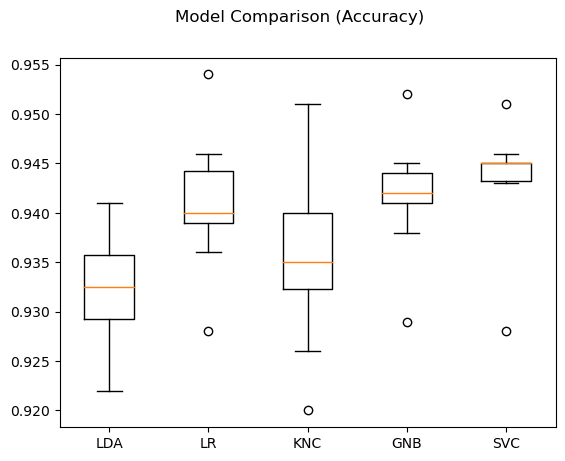

In [45]:
#Plot box and whisker plot
figa = plt.figure()
figa.suptitle('Model Comparison (Accuracy)')
ax = figa.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Problem 2: Automate Machine Learning Workfows with Pipeline (12 points)
In this problem, you will continue to use the dataset from problem 1. You will Pipeline utilities in
Python scikit-learn to automate standard applied machine learning workflows.

In [46]:
#import necessary packages to the Jupyter notebook
#Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest



array = data.values

# separate array into input and output components
X = array [:,0:8]
Y = array [:,8]

(A) Define a 5-step pipeline with the following steps; and perform a k-fold cross validation using
KFold with ‘random state =5’ (2 points), and provide a summary of accuracy of the setup
on the dataset.

    i. Standardize the data using StandardScaler() .(2 points)
    ii. Extract 3 features with Principal Component Analysis using PCA() .(2 points)
    iii. Extract 6 features with statistical selection using SelectKBest() .(2 points)
    iv. Combine features, extracted from two previous steps using FeatureUnion() .(2 points)
    v. Learn a Logistic Regression using LogisticRegression with ‘liblinear’ solver.(2 points)

In [47]:
#Define 5 pipeline steps
scaler = StandardScaler()
pca = PCA(n_components=3)
select = SelectKBest(k=6)
combined_features = FeatureUnion([('pca', pca), ('select', select)])
logreg = LogisticRegression(solver='liblinear')

pipeline = Pipeline(steps=[('scaler', scaler), ('features', combined_features), ('logreg', logreg)])

#Define kfold cross-validation 
kfold = KFold(n_splits=10, shuffle=True, random_state=5)

#Evaluate pipeline through cross_val
scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')

#Print mean and STD 
print('Accuracy: mean={:f} STD=({:f})'.format(scores.mean(), scores.std()))

Accuracy: mean=0.940900 STD=(0.005576)


Problem 3: Improve Performance with Ensembles (13 points)
In this problem, you will continue to use the dataset from problem 1. You will create ensembles in
Python using scikit-learn to improve the performance of models on your problems. For each ensemble
algorithm use 10-fold cross-validation using KFold ; and the classification accuracy performance
metric to report the reuslts.

In [48]:
#import necessary packages to the Jupyter notebook
#Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# read and load the csv data file
filename = "/Users/jeremybouhadana/Downloads/myClassDataSet2.csv"
data = read_csv(filename)

array = data.values

# separate array into input and output components
X = array [:,0:8]
Y = array [:,8]

(A) Create a BaggingClassifier with the Classification and Regression Trees algorithm using
DecisionTreeClassifier with total number of 100 trees; For both k-fold and Bagging classifier use the ‘random state = 7’; Then, report the mean classification accuracy. (5 points)

In [49]:
#Initialize DecisionTreeClassifier
dtc = DecisionTreeClassifier()

#Create BaggingClassifier with total number of 100 trees
bc = BaggingClassifier(dtc, n_estimators=100, random_state=7)

#Initialize kfold with random state 7
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

#Cross validation and report the mean classification accuracy
scores = cross_val_score(bc, X, y, cv=kfold)
mean_accuracy = scores.mean()

print("Mean classification accuracy: {:f}".format(mean_accuracy))

Mean classification accuracy: 0.950600


(B) Create a AdaBoostClassifier using 30 decision trees in sequence; For both k-fold and AdaBoost Classifier use the ‘random state = 7’; Then, report the mean classification accuracy. (3
points)

In [50]:
#Create a AdaBoostClassifier using 30 decision trees in sequence
abc = AdaBoostClassifier(base_estimator=dtc, n_estimators=30, random_state=7)

#k-fold cross-validation with random state = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(abc, X, y, cv=kfold)

#Report the mean classification accuracy
print("Mean classification accuracy:", results.mean())

Mean classification accuracy: 0.9246000000000001


(C) Create a VotingClassifier that combines the predictions of three classification models including logistic regression ( LogisticRegression with ‘liblinear’ solver), classification and
regression trees ( DecisionTreeClassifier ) and support vector machines ( SVC ) together,
and provide a mean estimate of classification accuracy. For k-fold use the ‘random state = 7’.
(5 points)

In [54]:
#Define missing model (SVC) as dtc and logreg have been previously defined 
supportvector_model = SVC()

#Create VotingClassifier
vm = VotingClassifier(
    estimators=[('lr', logreg), ('dt', dtc), ('svc', supportvector_model)],
    voting='hard')

#Use k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(vm, X, y, cv=kfold)

#Print mean accuracy
print(f"Mean estimate of classification accuracy: {results.mean()}")

Mean estimate of classification accuracy: 0.9473999999999998
